In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Load data

In [3]:
data= pd.read_excel('data_yellow.xlsx')

In [4]:
data

,Patient ID,Age,Sex,Height (in),Height (cm),Weight (Ib),Weight (kg),Time (min),VO2/kg STPD (ml/kg/m),VO2 STPD (L/min),...,VCO2 STPD (L/min),(ml/min).1,VE STPD (L/min),RQ,RR (BPM),VE/VO2 (BT/ST),METS,TM SPD(mph),Start,End
0,1,46,F,67.000000,170.179993,186.380997,84.718636,10:00,3.240702,0.274548,...,0.187871,187.870577,5.767894,0.684291,9.828010,26.038467,0.925915,0.0,40,58
1,1,46,F,67.000000,170.179993,186.380997,84.718636,10:18,3.516727,0.297932,...,0.201171,201.170638,6.319565,0.675223,10.215664,26.289713,1.004779,0.0,40,58
2,1,46,F,67.000000,170.179993,186.380997,84.718636,10:33,3.250189,0.275352,...,0.184475,184.475496,5.858399,0.669964,11.590470,26.369850,0.928625,0.0,40,58
3,1,46,F,67.000000,170.179993,186.380997,84.718636,10:45,3.492338,0.295866,...,0.199458,199.458122,6.244431,0.674150,10.535557,26.158564,0.997811,0.0,40,58
4,1,46,F,67.000000,170.179993,186.380997,84.718636,11:09,3.253784,0.275656,...,0.188681,188.680843,5.913777,0.684479,7.431874,26.589708,0.929653,0.0,40,58
5,1,46,F,67.000000,170.179993,186.380997,84.718636,11:17,2.975240,0.252058,...,0.173725,173.725083,5.513169,0.689226,7.884363,27.109190,0.850069,0.0,40,58
6,1,46,F,67.000000,170.179993,186.380997,84.718636,11:32,2.892640,0.245061,...,0.170633,170.632601,5.384082,0.696288,7.599747,27.230433,0.826469,0.0,40,58
7,1,46,F,67.000000,170.179993,186.380997,84.718636,11:49,2.879510,0.243948,...,0.174807,174.807489,5.234431,0.716576,10.625738,26.594280,0.822717,0.0,40,58
8,1,46,F,67.000000,170.179993,186.380997,84.718636,12:01,3.299136,0.279498,...,0.203950,203.950420,5.908507,0.729702,9.950249,26.200815,0.942610,0.0,40,58
9,1,46,F,67.000000,170.179993,186.380997,84.718636,12:15,3.675211,0.311359,...,0.227108,227.107674,6.575547,0.729408,12.784090,26.175018,1.050060,0.0,40,58


In [5]:
subject = data.groupby('Patient ID')
subject

In [13]:
pids = data['Patient ID'].unique()

In [14]:
rmr_list =[]
for pid in pids:
    VO2 = subject.get_group(pid)['(ml/min)']
    mean_VO2 = np.mean(VO2)
    VCO2 = subject.get_group(pid)['(ml/min).1']
    mean_VCO2 = np.mean(VCO2)
    rmr = ((3.9 * mean_VO2) + (1.1 * mean_VCO2)) * 1.44
    rmr_list.append(rmr)

In [22]:
column = ['RMR']
rmr_df = pd.DataFrame(rmr_list, columns = column)

In [21]:
rmr_df.to_excel('Calculated RMR.xlsx', index = False)

In [27]:
data_mean = data.groupby('Patient ID').mean()
data_max = data.groupby('Patient ID').max()

In [28]:
data_plot = data_max[['Age','Sex']]
data_plot['RMR'] = rmr_list

C:\Users\NMRL-AIO\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


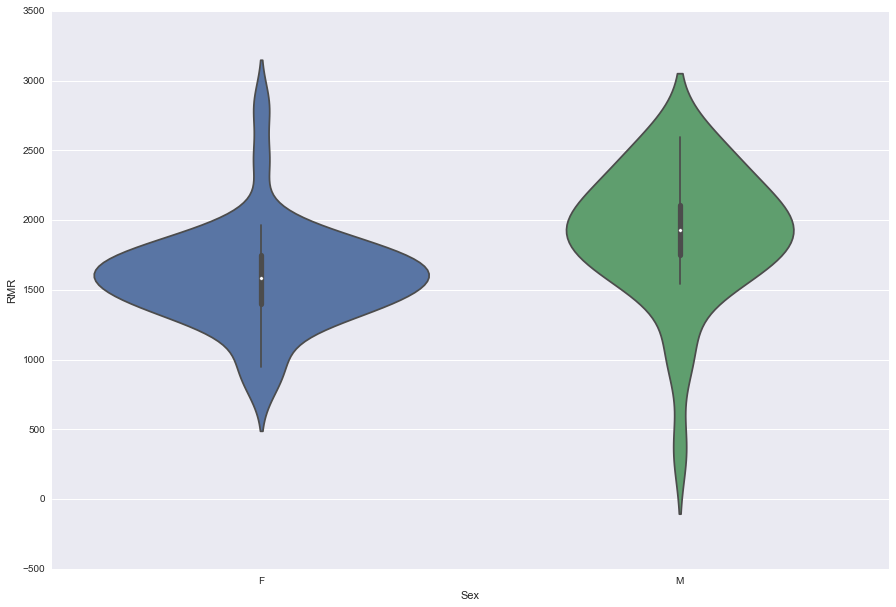

In [29]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Sex', y='RMR', data = data_plot);